# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Frederik Samra Sarongallo
- **Email:** m239b4ky1557@bangkit.academy
- **ID Dicoding:** frederik_samra

## Menentukan Pertanyaan Bisnis

- Pada hari apa penyewaan sepeda paling banyak dilakukan?
- Pada jam berapa penyewaan sepeda paling banyak dilakukan?
- Bagaimana pengaruh cuaca terkait dengan jumlah penyewaan sepada?

## Import Semua Packages/Library yang Digunakan

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import streamlit as st
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [4]:
#Table Day
day_df = pd.read_csv("https://raw.githubusercontent.com/frederiksamra/analisis-data-dengan-python/fa5df26b3147871f2918b3c02c7b3024b30aaf0f/day.csv")
print("\n ===================== Table Day ========================= \n")
print(day_df.head())

#Table Hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/frederiksamra/analisis-data-dengan-python/refs/heads/main/hour.csv")
print("\n ===================== Table Hour ========================= \n")
print(hour_df.head())


 ===================== Table Day ========================= 

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   

**Insight:**
- Kita dapat mengetahui bahwa pada tabel day memiliki total 16 kolom (instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt) dan juga memperoleh informasi mengenai 5 data pertama yang ada di dalam tabel day
- Tabel hour memiliki total 17 kolom (instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, tempa, hum, windspeed, casual, registered, cnt) dan juga kita memperoleh 5 data pertama yang ada di dalam tabel hour

### Assessing Data

In [5]:
#Day
print("\n ===================== Day Info ========================= \n")
print(day_df.info())
print("\n ===================== Day Check Duplicate ========================= \n")
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("\n ===================== Day Describe ========================= \n")
print(day_df.describe())

#Hour
print("\n ===================== Hour Info ========================= \n")
print(hour_df.info())
print("\n ===================== Hour Check Duplicate ========================= \n")
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("\n ===================== Hour Describe ========================= \n")
hour_df.describe()



 ===================== Day Info ========================= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

 ===================== Day

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- jumlah data sesuai dan tidak terdapat duplikasi sehingga tidak terdapat permasalahan pada data tabel day
- jumlah data sesuai dan tidak terdapat duplikasi sehingga tidak terdapat permasalahan pada data tabel hour

### Cleaning Data

In [26]:
#Tidak terdapat masalah di dalam dataset sehingga tidap dilakukam cleaning data

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Day
day_df.describe(include="all")

penyewa_day_agg = day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

print(penyewa_day_agg)

        instant     cnt                                      
        nunique     sum   max   min         mean          std
weekday                                                      
0           105  444027  8227   605  4228.828571  1872.496629
1           105  455503  7525    22  4338.123810  1793.074013
2           104  469109  7767   683  4510.663462  1826.911642
3           104  473048  8173   441  4548.538462  2038.095884
4           104  485395  7804   431  4667.259615  1939.433317
5           104  487790  8362  1167  4690.288462  1874.624870
6           105  477807  8714   627  4550.542857  2196.693009


In [31]:
# Hour
hour_df.describe(include="all")
penyewa_hour_agg = hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

print(penyewa_hour_agg)

   instant     cnt                                 
   nunique     sum  max min        mean         std
hr                                                 
0      726   39130  283   2   53.898072   42.307910
1      724   24164  168   1   33.375691   33.538727
2      715   16352  132   1   22.869930   26.578642
3      697    8174   79   1   11.727403   13.239190
4      697    4428   28   1    6.352941    4.143818
5      717   14261   66   1   19.889819   13.200765
6      725   55132  213   1   76.044138   55.084348
7      727  154171  596   1  212.064649  161.441936
8      727  261001  839   5  359.011004  235.189285
9      727  159438  426  14  219.309491   93.703458
10     727  126257  539   8  173.668501  102.205413
11     727  151320  663  10  208.143054  127.495536
12     728  184414  776   3  253.315934  145.081134
13     729  184919  760  11  253.661180  148.107657
14     729  175652  750  12  240.949246  147.271574
15     729  183149  750   7  251.233196  144.632541
16     730  

# Melihat hubungan antara hari dengan banyaknya penyewa berdasarkan kondisi cuaca

In [8]:

dayweather_agg = day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

print(dayweather_agg)

           instant      cnt                                     
           nunique      sum   max  min         mean          std
weathersit                                                      
1              463  2257952  8714  431  4876.786177  1879.483989
2              247   996858  8362  605  4035.862348  1809.109918
3               21    37869  4639   22  1803.285714  1240.284449


# Melihat hubungan antara jam dengan banyaknya penyewa berdasarkan cuaca

In [9]:
hourweather_agg = hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

print(hourweather_agg)

           instant      cnt                                 
           nunique      sum  max min        mean         std
weathersit                                                  
1            11413  2338173  977   1  204.869272  189.487773
2             4544   795952  957   1  175.165493  165.431589
3             1419   158331  891   1  111.579281  133.781045
4                3      223  164  23   74.333333   77.925178


**Insight:**
- penyewaan sepeda terbanyak dilakukan pada weekday 5 sedangkan yang paling sedikit pada weekday 0 nilai ini berdasarkan total semua data yang ada  di dalam dataset
- juga terdapat informasi mengenai jumlah terbanyak dan terkecil, median dan juga standar deviasi penyewaan sepeda pada setiap kondisi cuaca berdasarkan jam serta hari
- selain itu juga terdapat perbedaan kondisi cuaca pada tabel hari dan jam dimana pada tabel hari hanya terdapat 3 kondisi cuaca sedangkan pada tabel hour terdapat 4 kondisi cuaca

## Visualization & Explanatory Analysis

### Pertanyaan 1:

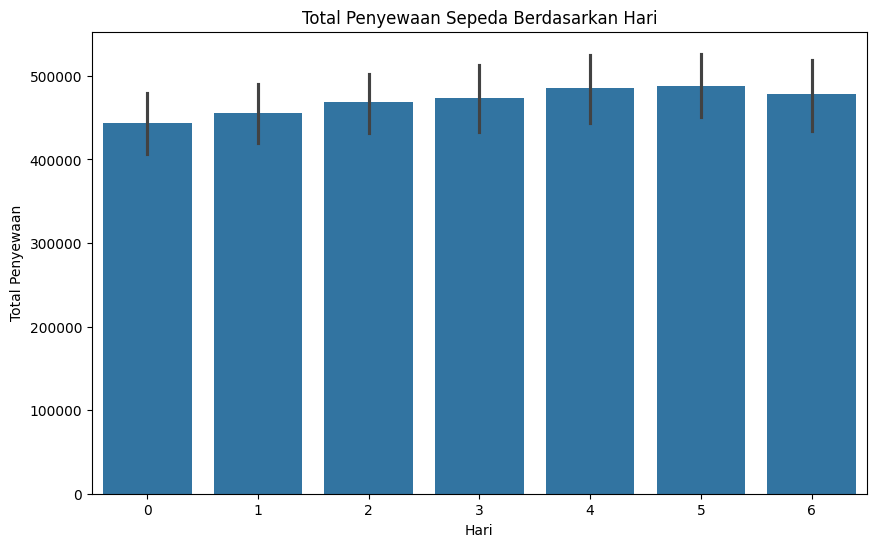

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum)
plt.title('Total Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 2:

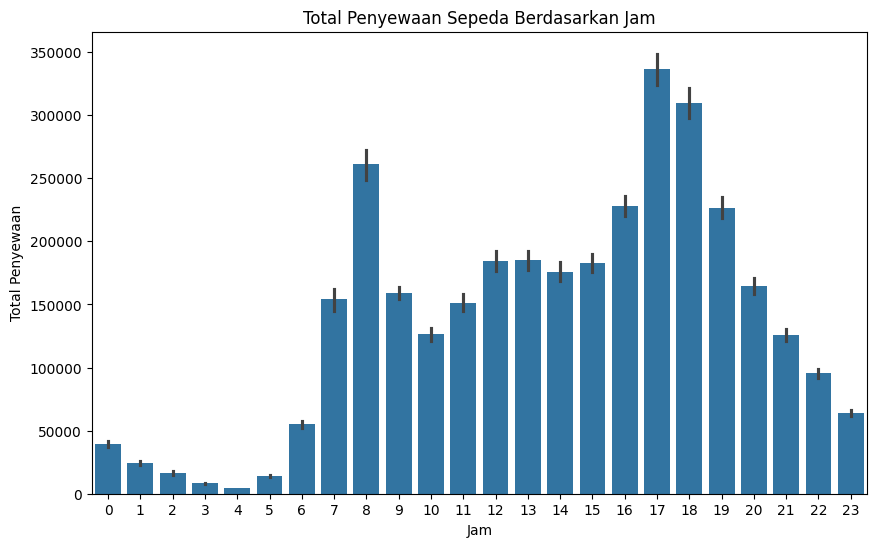

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x='hr', y='cnt', data=hour_df, estimator=sum)
plt.title('Total Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 3:

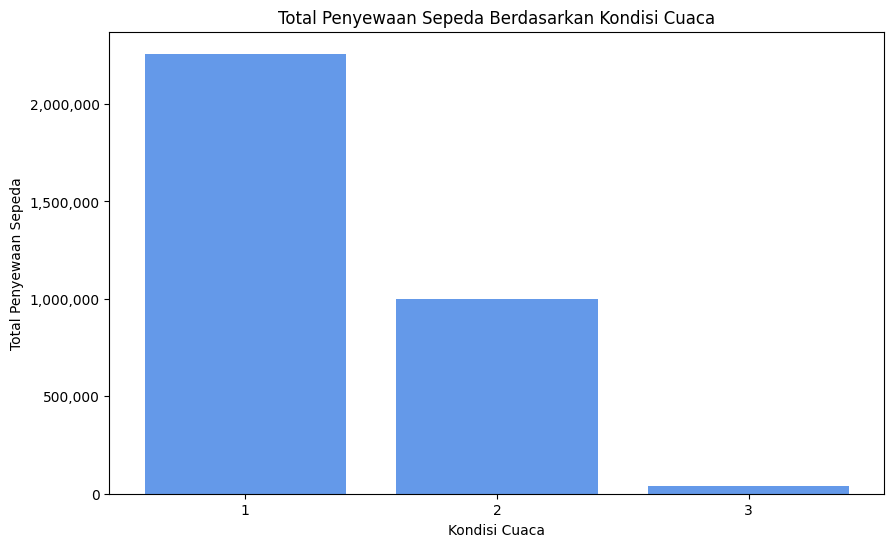

In [23]:

plt.figure(figsize=(10, 6))
y= dayweather_agg[('cnt', 'sum')]
x= dayweather_agg.index
plt.bar(x,y, color='#6499E9')
plt.xticks(ticks=np.arange(min(x), max(x)+1, 1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

**Insight:**
- berdasarkar visualisasi pertanyaan pertama kita dapat melihat bahwa perbedaan jumlah penyewaan sepeda tidak terlalu jauh berdasarkan harinya
- pada visualisasi pertanyaan ke 2 terdapat perbedaan yang cukup signifikan dari jumlah penyewaan sepeda berdasarkan jam
- pada malam sampai subuh hari mulai dari jam 0-6 merupakan jam dimana jumlah penyewaan sepeda sangat sedikit
- jumlah penyewaan sepeda pada setiap kondisi cuaca memiliki perbedaan yang sangat besar

## Analisis Lanjutan (Opsional)

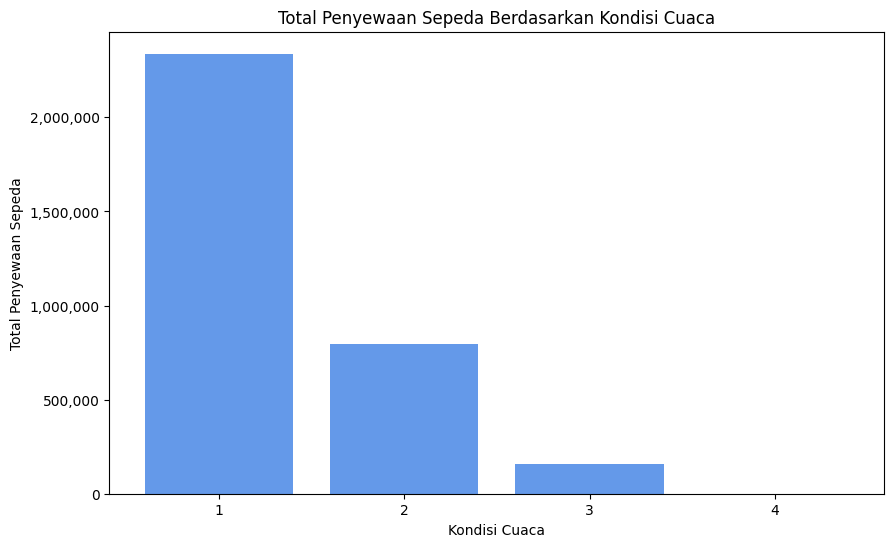

In [24]:

plt.figure(figsize=(10, 6))
y= hourweather_agg[('cnt', 'sum')]
x= hourweather_agg.index
plt.bar(x,y, color='#6499E9')
plt.xticks(ticks=np.arange(min(x), max(x)+1, 1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

**Insight:**
- Setelah saya menganalisis lebih lanjut saya menemukan perbedaan pada jumlah kondisi cuaca berdasarkan hari dan jam. Dimana jumlah kondisi cuaca berdasarkan hari hanya 3 sedangkan berdasarkan jam sebanyak 4 kondisi.
- Untuk perbedaan jumlah penyewaan sepeda masih sama yaitu sangat signifikan

## Conclusion

- Conclution pertanyaan 1: Penyewaan sepeda paling banyak dilakukan pada hari nomor 5 dari weekday
- Conclution pertanyaan 2: Penyewaan sepeda paling banyak dilakukan pada jam 17.00
- Conclution pertanyaan 3: Kondisi cuaca sangat berpengaruh dalam penyewaan sepeda dimana dari data dapat kita lihat bahwa semakin buruk kondisi cuaca maka penyewaan sepeda juga akan semakin kecil, bahkan perbedaannya sangat signifikan. Hal ini berarti kondisi cuaca yang baik merupakan faktor yang sangat penting untuk penyewaan sepeda